### Dataframe que indica si el paciente tiene una enfermedad cardíaca en funcion de si bebe de forma casual, fuma, etc.

In [1]:
import pandas as pd
import numpy as np

# Modelo
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


# Visualización
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

In [2]:
data=pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15519 entries, 0 to 15518
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      15519 non-null  object 
 1   BMI               15519 non-null  float64
 2   Smoking           15519 non-null  object 
 3   AlcoholDrinking   15519 non-null  object 
 4   Stroke            15519 non-null  object 
 5   PhysicalHealth    15519 non-null  float64
 6   MentalHealth      15519 non-null  float64
 7   DiffWalking       15519 non-null  object 
 8   Sex               15519 non-null  object 
 9   AgeCategory       15519 non-null  object 
 10  Race              15519 non-null  object 
 11  Diabetic          15519 non-null  object 
 12  PhysicalActivity  15519 non-null  object 
 13  GenHealth         15519 non-null  object 
 14  SleepTime         15519 non-null  float64
 15  Asthma            15519 non-null  object 
 16  KidneyDisease     15519 non-null  object

In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease'] 

# Dividimos los datos en entrenamiento y prueba antes de preprocesarlos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identificamos las columnas categóricas
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Creamos el preprocesador que convierte las columnas categóricas usando OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        #handle_unknown='ignore' interesante si trabajas con datos en vivo y en los que pueden aparecer categorías inesperadas
    ],
    remainder='passthrough',  # Las demás columnas (numéricas) se dejan como están
    force_int_remainder_cols=False  # las columnas que no se transforman siguen con su tipo de dato original
)
# Definir el pipeline para preprocesar los datos y definir el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Entrenar el pipeline con los datos de entrenamiento
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Smoking', 'AlcoholDrinking',
                                                   'Stroke', 'DiffWalking',
                                                   'Sex', 'AgeCategory', 'Race',
                                                   'Diabetic',
                                                   'PhysicalActivity',
                                                   'GenHealth', 'Asthma',
                                                   'KidneyDisease',
                                                   'SkinCancer'])])),
                ('classifier', RandomForestClassifier())])

In [5]:
#predicciones
y_pred = pipeline.predict(X_test)

In [6]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9039948453608248
Precision: 0.3728813559322034
Recall: 0.07773851590106007


In [7]:
# mostramos un dataframe con los resultados de las predicciones
results = pd.DataFrame({'HeartDisease': y_test, 'Predicted_HeartDisease': y_pred})
results.head(30)

,HeartDisease,Predicted_HeartDisease
14028,No,No
7916,No,No
15516,Yes,No
2877,No,No
13503,No,No
3636,No,No
4912,No,No
8450,No,No
5515,No,No
12196,Yes,No


In [8]:
rf_model = pipeline.named_steps['classifier']

In [9]:
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

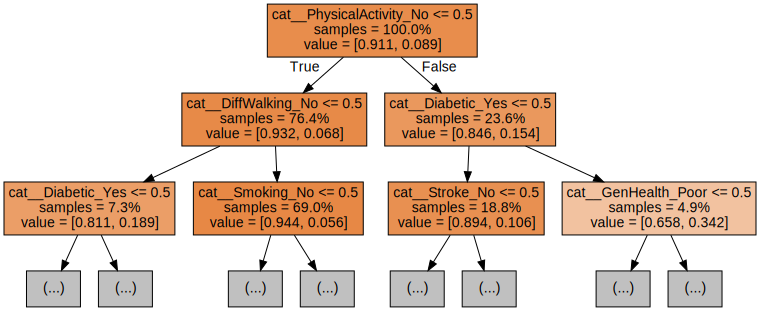

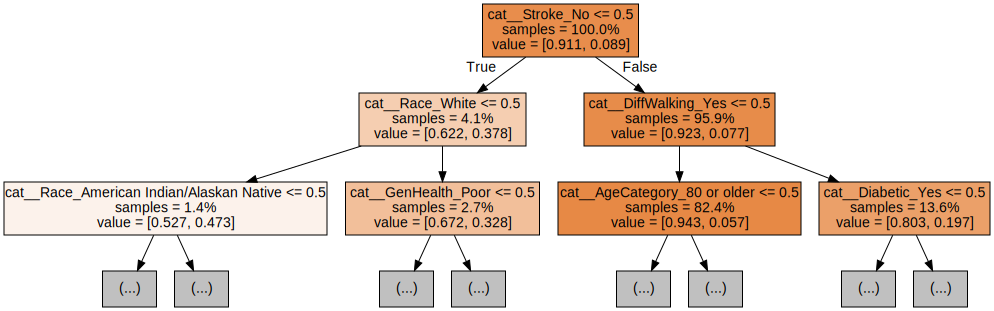

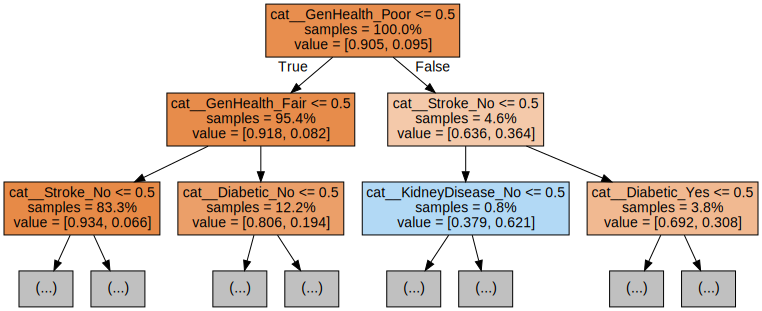

In [10]:
for i in range(3):
    tree = rf_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=feature_names,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [11]:
# Definir el espacio de búsqueda para los  hiperparámetros  Esta versión puede ralentizarse mucho...
param_dist = {
    'classifier__n_estimators': randint(10, 60),    # Número de árboles en RandomForest
    'classifier__max_depth': randint(1, 20),          # Profundidad máxima de los árboles
    'classifier__min_samples_split': randint(2, 20),  # Mínimas muestras para dividir un nodo
    'classifier__min_samples_leaf': randint(1, 20),   # Mínimas muestras en una hoja
    'classifier__bootstrap': [True, False]            # Usar muestreo bootstrap o no
}

# Crear el objeto RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=3, cv=3, verbose=2, random_state=42)

# Ajustar el modelo con los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros encontrados:", random_search.best_params_)

# Mejor modelo
best_rf = random_search.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END classifier__bootstrap=True, classifier__max_depth=15, classifier__min_samples_leaf=11, classifier__min_samples_split=9, classifier__n_estimators=30; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=15, classifier__min_samples_leaf=11, classifier__min_samples_split=9, classifier__n_estimators=30; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=15, classifier__min_samples_leaf=11, classifier__min_samples_split=9, classifier__n_estimators=30; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=19, classifier__min_samples_leaf=11, classifier__min_samples_split=12, classifier__n_estimators=33; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_depth=19, classifier__min_samples_leaf=11, classifier__min_samples_split=12, classifier__n_estimators=33; total time=   0.1s
[CV] END classifier__bootstrap=True, classifier__max_d

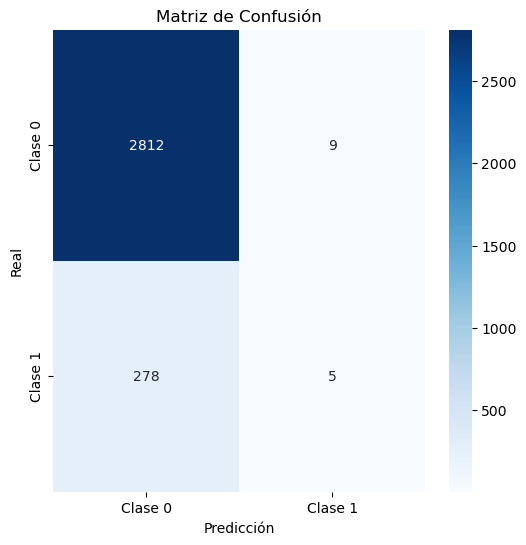

In [12]:
y_pred=best_rf.predict(X_test) #realizamos predicciones sobre el conjunto de prueba
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión usando un mapa de calor
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clase 0", "Clase 1"], yticklabels=["Clase 0", "Clase 1"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9075386597938144
Precision: 0.35714285714285715
Recall: 0.0176678445229682


In [14]:
# mostramos un dataframe con los resultados de las predicciones
results = pd.DataFrame({'HeartDisease': y_test, 'Predicted_HeartDisease': y_pred})
results.head(30)

,HeartDisease,Predicted_HeartDisease
14028,No,No
7916,No,No
15516,Yes,No
2877,No,No
13503,No,No
3636,No,No
4912,No,No
8450,No,No
5515,No,No
12196,Yes,No


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Definir los modelos individuales
model1 = ('rf', rf_model)  # Usar el RandomForestClassifier entrenado anteriormente
model2 = ('lr', LogisticRegression(max_iter=1000, random_state=42))
model3 = ('svc', SVC(probability=True, random_state=42))

# Crear el VotingClassifier con los modelos
voting_clf = VotingClassifier(estimators=[model1, model2, model3], voting='soft')

# Crear un nuevo pipeline que incluya el preprocesador y el VotingClassifier
voting_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('voting_clf', voting_clf)
])

# Entrenar el nuevo pipeline con los datos de entrenamiento
voting_pipeline.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_voting = voting_pipeline.predict(X_test)

# Evaluar el rendimiento del VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, pos_label='Yes')
recall_voting = recall_score(y_test, y_pred_voting, pos_label='Yes')

print("Voting Classifier Accuracy:", accuracy_voting)

Voting Classifier Accuracy: 0.9065721649484536


In [16]:
from sklearn.ensemble import StackingClassifier

# Definir los modelos base
base_models = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Definir el modelo meta
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Crear el StackingClassifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=3)

# Crear un nuevo pipeline que incluya el preprocesador y el StackingClassifier
stacking_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking_clf', stacking_clf)
])

# Entrenar el nuevo pipeline con los datos de entrenamiento
stacking_pipeline.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_stacking = stacking_pipeline.predict(X_test)

# Evaluar el rendimiento del StackingClassifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, pos_label='Yes')
recall_stacking = recall_score(y_test, y_pred_stacking, pos_label='Yes')

print("Stacking Classifier Accuracy:", accuracy_stacking)
print("Stacking Classifier Precision:", precision_stacking)
print("Stacking Classifier Recall:", recall_stacking)

Stacking Classifier Accuracy: 0.9104381443298969
Stacking Classifier Precision: 0.5352112676056338
Stacking Classifier Recall: 0.13427561837455831


In [19]:
from xgboost import XGBClassifier

# Convertir la variable objetivo y a valores numéricos
y_train_numeric = y_train.map({'No': 0, 'Yes': 1})
y_test_numeric = y_test.map({'No': 0, 'Yes': 1})

# Crear el pipeline para preprocesar los datos y definir el modelo XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Entrenar el pipeline con los datos de entrenamiento
xgb_pipeline.fit(X_train, y_train_numeric)

# Realizar predicciones con el conjunto de prueba
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluar el rendimiento del modelo XGBoost
accuracy_xgb = accuracy_score(y_test_numeric, y_pred_xgb)
precision_xgb = precision_score(y_test_numeric, y_pred_xgb, pos_label=1)
recall_xgb = recall_score(y_test_numeric, y_pred_xgb, pos_label=1)

print("XGBoost Classifier Accuracy:", accuracy_xgb)
print("XGBoost Classifier Precision:", precision_xgb)
print("XGBoost Classifier Recall:", recall_xgb)

XGBoost Classifier Accuracy: 0.9049613402061856
XGBoost Classifier Precision: 0.4473684210526316
XGBoost Classifier Recall: 0.18021201413427562


c:\Users\alejandro.regueiroru\AppData\Local\miniconda3\envs\MachineLearning\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:40:30] WARNING: D:\bld\xgboost-split_1738880195977\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
